# TITLE: CREDIT CARD FRAUD DETECTION
# NAME: FARZANA PATEL
# GROUP: PGDDS C14
# YEAR: 2019-2020


## Importing Libraries 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score
import seaborn as sns
from matplotlib import pyplot
from imblearn.combine import SMOTETomek
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import TomekLinks
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

C:\Users\Farzana\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Farzana\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Farzana\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be remo

# Loading data

In [2]:
data = pd.read_csv("creditcard.csv")

In [3]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


# Performing EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
data.shape

(284807, 31)

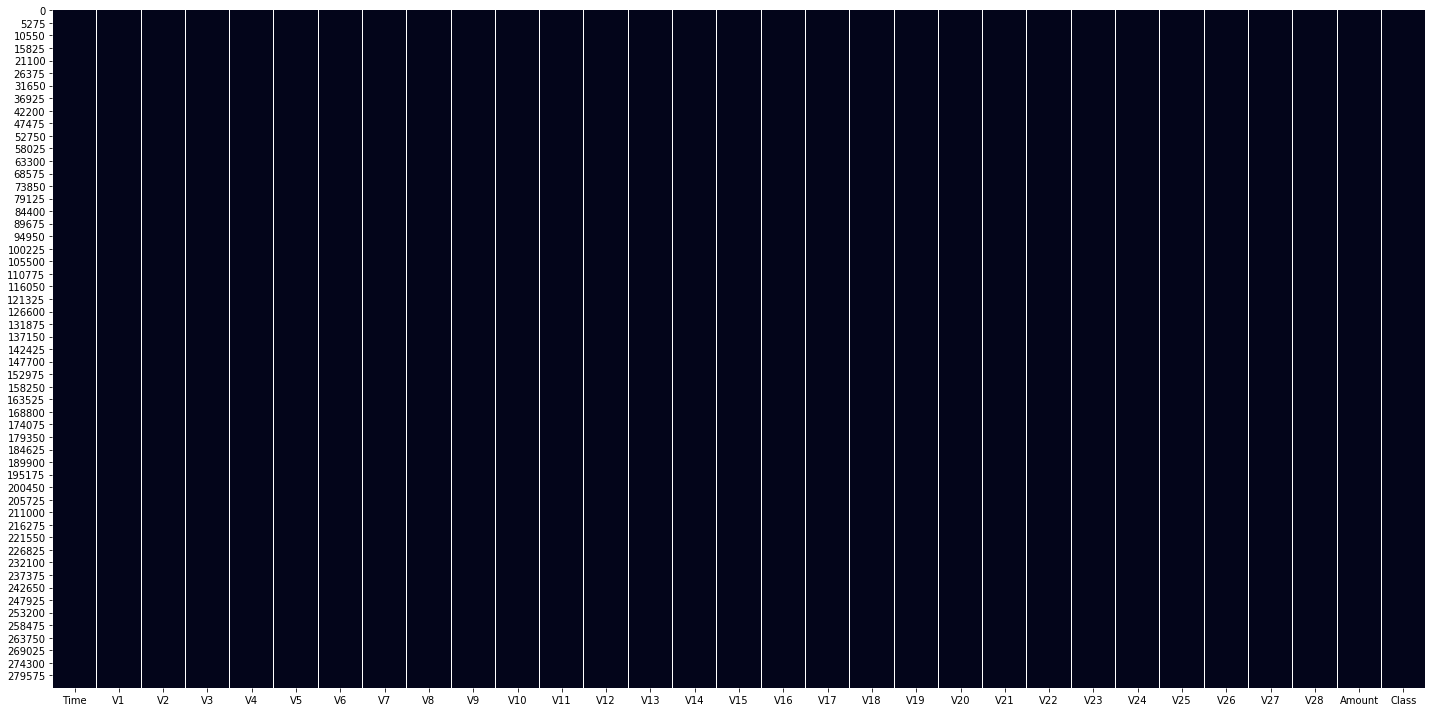

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isnull(), cbar=False)
plt.tight_layout()
plt.show()

In [9]:
data.isnull().sum().all()

False

In [10]:
data.isnull().all(axis=0).any()

False

## Data Visualization

Text(0.7, 0.45, '492\n(0.1727%)')

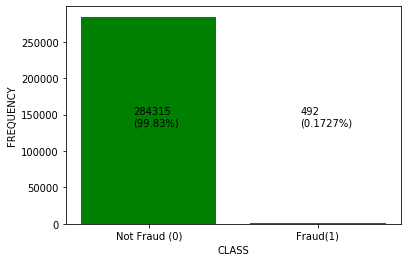

In [11]:
plt.bar(['Not Fraud (0)','Fraud(1)'], data['Class'].value_counts(), color=['g','r'])
plt.xlabel('CLASS')
plt.ylabel('FREQUENCY')
plt.annotate('{}\n({:.4}%)'.format(data['Class'].value_counts()[0],data['Class'].value_counts()[0]/data['Class'].count()*100),(0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}\n({:.4}%)'.format(data['Class'].value_counts()[1], data['Class'].value_counts()[1]/data['Class'].count()*100),(0.70, 0.45), xycoords='axes fraction')

# WE CAN SEE THERE IS HUGE CLASS IMBALANCE HERE....

In [ ]:
## Hence, I plan to use upsampling and down sampling methods to have a balanced class dataset ahead...

In [13]:
fraud = data[data.Class == 1]
normal = data[data.Class == 0]

Text(0, 0.5, 'Frequency')

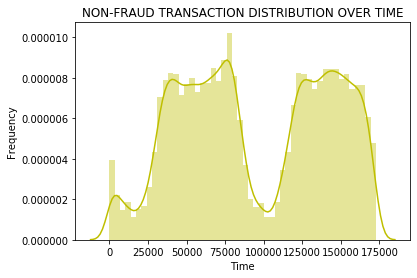

In [14]:
sns.distplot(normal.Time, color='y')
plt.title("NON-FRAUD TRANSACTION DISTRIBUTION OVER TIME")
plt.xlabel("Time")
plt.ylabel("Frequency")

# 2 peaks are observed over time which looks normal

Text(0, 0.5, 'Class')

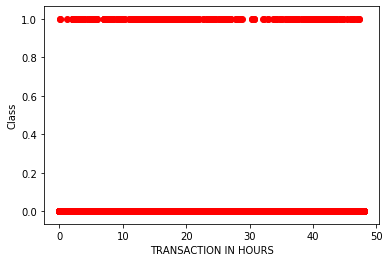

In [16]:
plt.scatter(data['Time']/(60*60), data['Class'], color='r')
plt.xlabel('TRANSACTION IN HOURS')
plt.ylabel('Class')

Text(0, 0.5, 'Frequency')

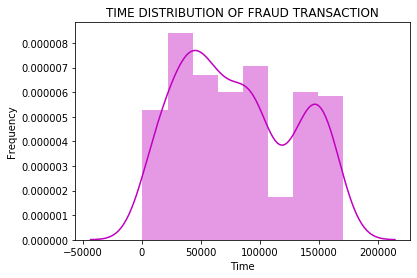

In [17]:
sns.distplot(fraud.Time, color='m')
plt.title("TIME DISTRIBUTION OF FRAUD TRANSACTION")
plt.xlabel("Time")
plt.ylabel("Frequency")

# Distribution of fraud transaction over time looks normal

In [19]:
# Time distribution doesn't give any datapoint out of the ordinary.

[]

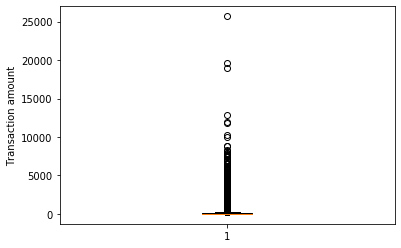

In [20]:
plt.boxplot(data['Amount'])
plt.ylabel('Transaction amount')
plt.plot()

Text(0, 0.5, 'Frequency')

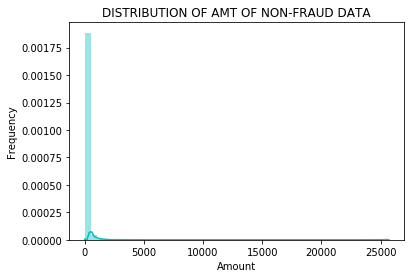

In [21]:
sns.distplot(normal.Amount, color='c')
plt.title("DISTRIBUTION OF AMT OF NON-FRAUD DATA")
plt.xlabel("Amount")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

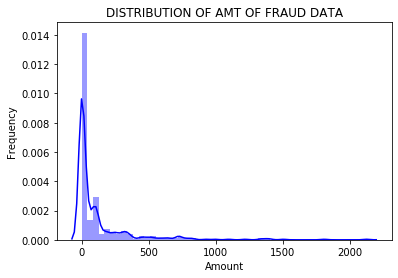

In [22]:
sns.distplot(fraud.Amount, color='b')
plt.title("DISTRIBUTION OF AMT OF FRAUD DATA")
plt.xlabel("Amount")
plt.ylabel("Frequency")

In [23]:
#Both the graphs peaks and slows down without any outliers 

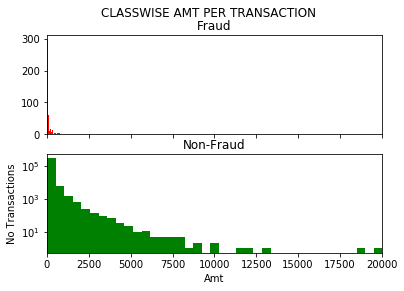

In [24]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('CLASSWISE AMT PER TRANSACTION')
bins = 50
ax1.hist(fraud.Amount, bins = bins, color='red')
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins, color='green')
ax2.set_title('Non-Fraud')
plt.xlabel('Amt')
plt.ylabel('No Transactions')
plt.xlim((0, 20000))
plt.yscale('Log')
plt.show()

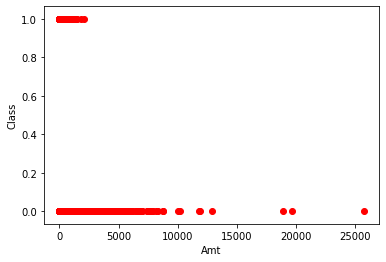

In [25]:
plt.scatter(data['Amount'], data['Class'], color='r')
plt.xlabel('Amt')
plt.ylabel('Class')
plt.show()

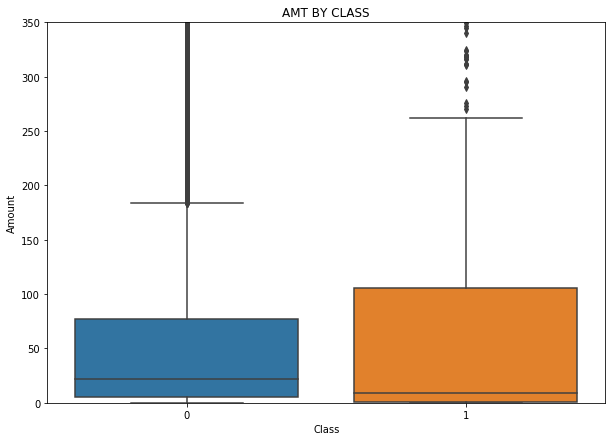

In [26]:
plt.figure(figsize = (10, 7))
ax = sns.boxplot(x = 'Class', y = 'Amount', data = data)
ax.set_ylim([0, 350])
plt.title('AMT BY CLASS')
plt.show()

In [27]:
## It is seen that there are fraud transactions for smaller amounts

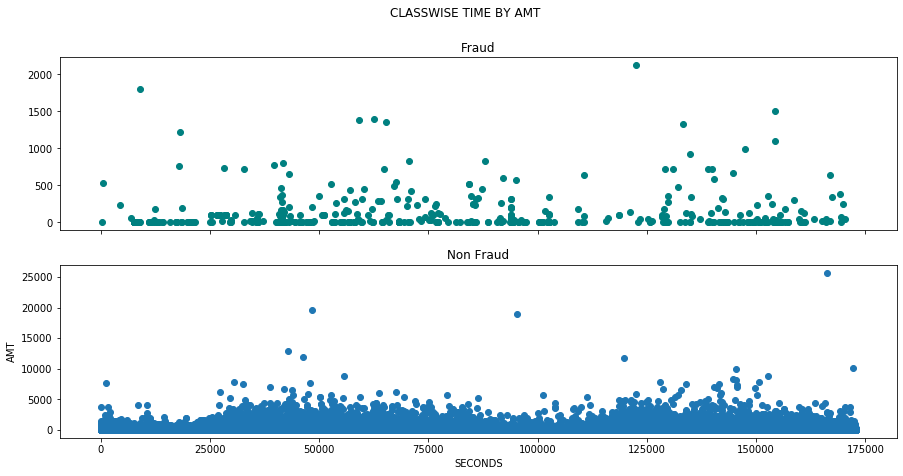

In [28]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,7))
f.suptitle('CLASSWISE TIME BY AMT')
ax1.scatter(fraud.Time, fraud.Amount,color = 'teal')
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Non Fraud')
plt.xlabel('SECONDS')
plt.ylabel('AMT')
plt.show()

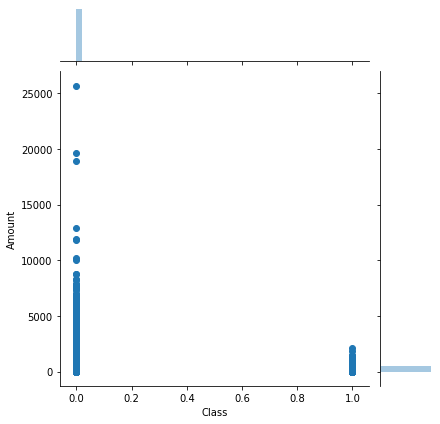

In [34]:
sns.jointplot(data['Class'],data['Amount'])
plt.show()

# Visualizing the distribution of the data. Skewed features will be transformed further with respective transformations.

## Data Scaling

In [29]:
# Dropping unnecessary variable
model_data = data.drop(['Time'], axis=1)

In [ ]:
##the dataset is scaled using MinMaxScaler as the amount values are higher than principal component features

In [30]:
# Standardizing amount
model_data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
model_data.head().transpose()

,0,1,2,3,4
V1,-1.359807,1.191857,-1.358354,-0.966272,-1.158233
V2,-0.072781,0.266151,-1.340163,-0.185226,0.877737
V3,2.536347,0.166480,1.773209,1.792993,1.548718
V4,1.378155,0.448154,0.379780,-0.863291,0.403034
V5,-0.338321,0.060018,-0.503198,-0.010309,-0.407193
V6,0.462388,-0.082361,1.800499,1.247203,0.095921
V7,0.239599,-0.078803,0.791461,0.237609,0.592941
V8,0.098698,0.085102,0.247676,0.377436,-0.270533
V9,0.363787,-0.255425,-1.514654,-1.387024,0.817739
V10,0.090794,-0.166974,0.207643,-0.054952,0.753074


## Standardized the features here in order to achieve zero mean and equal variance.

In [32]:
# Checking for corretlation

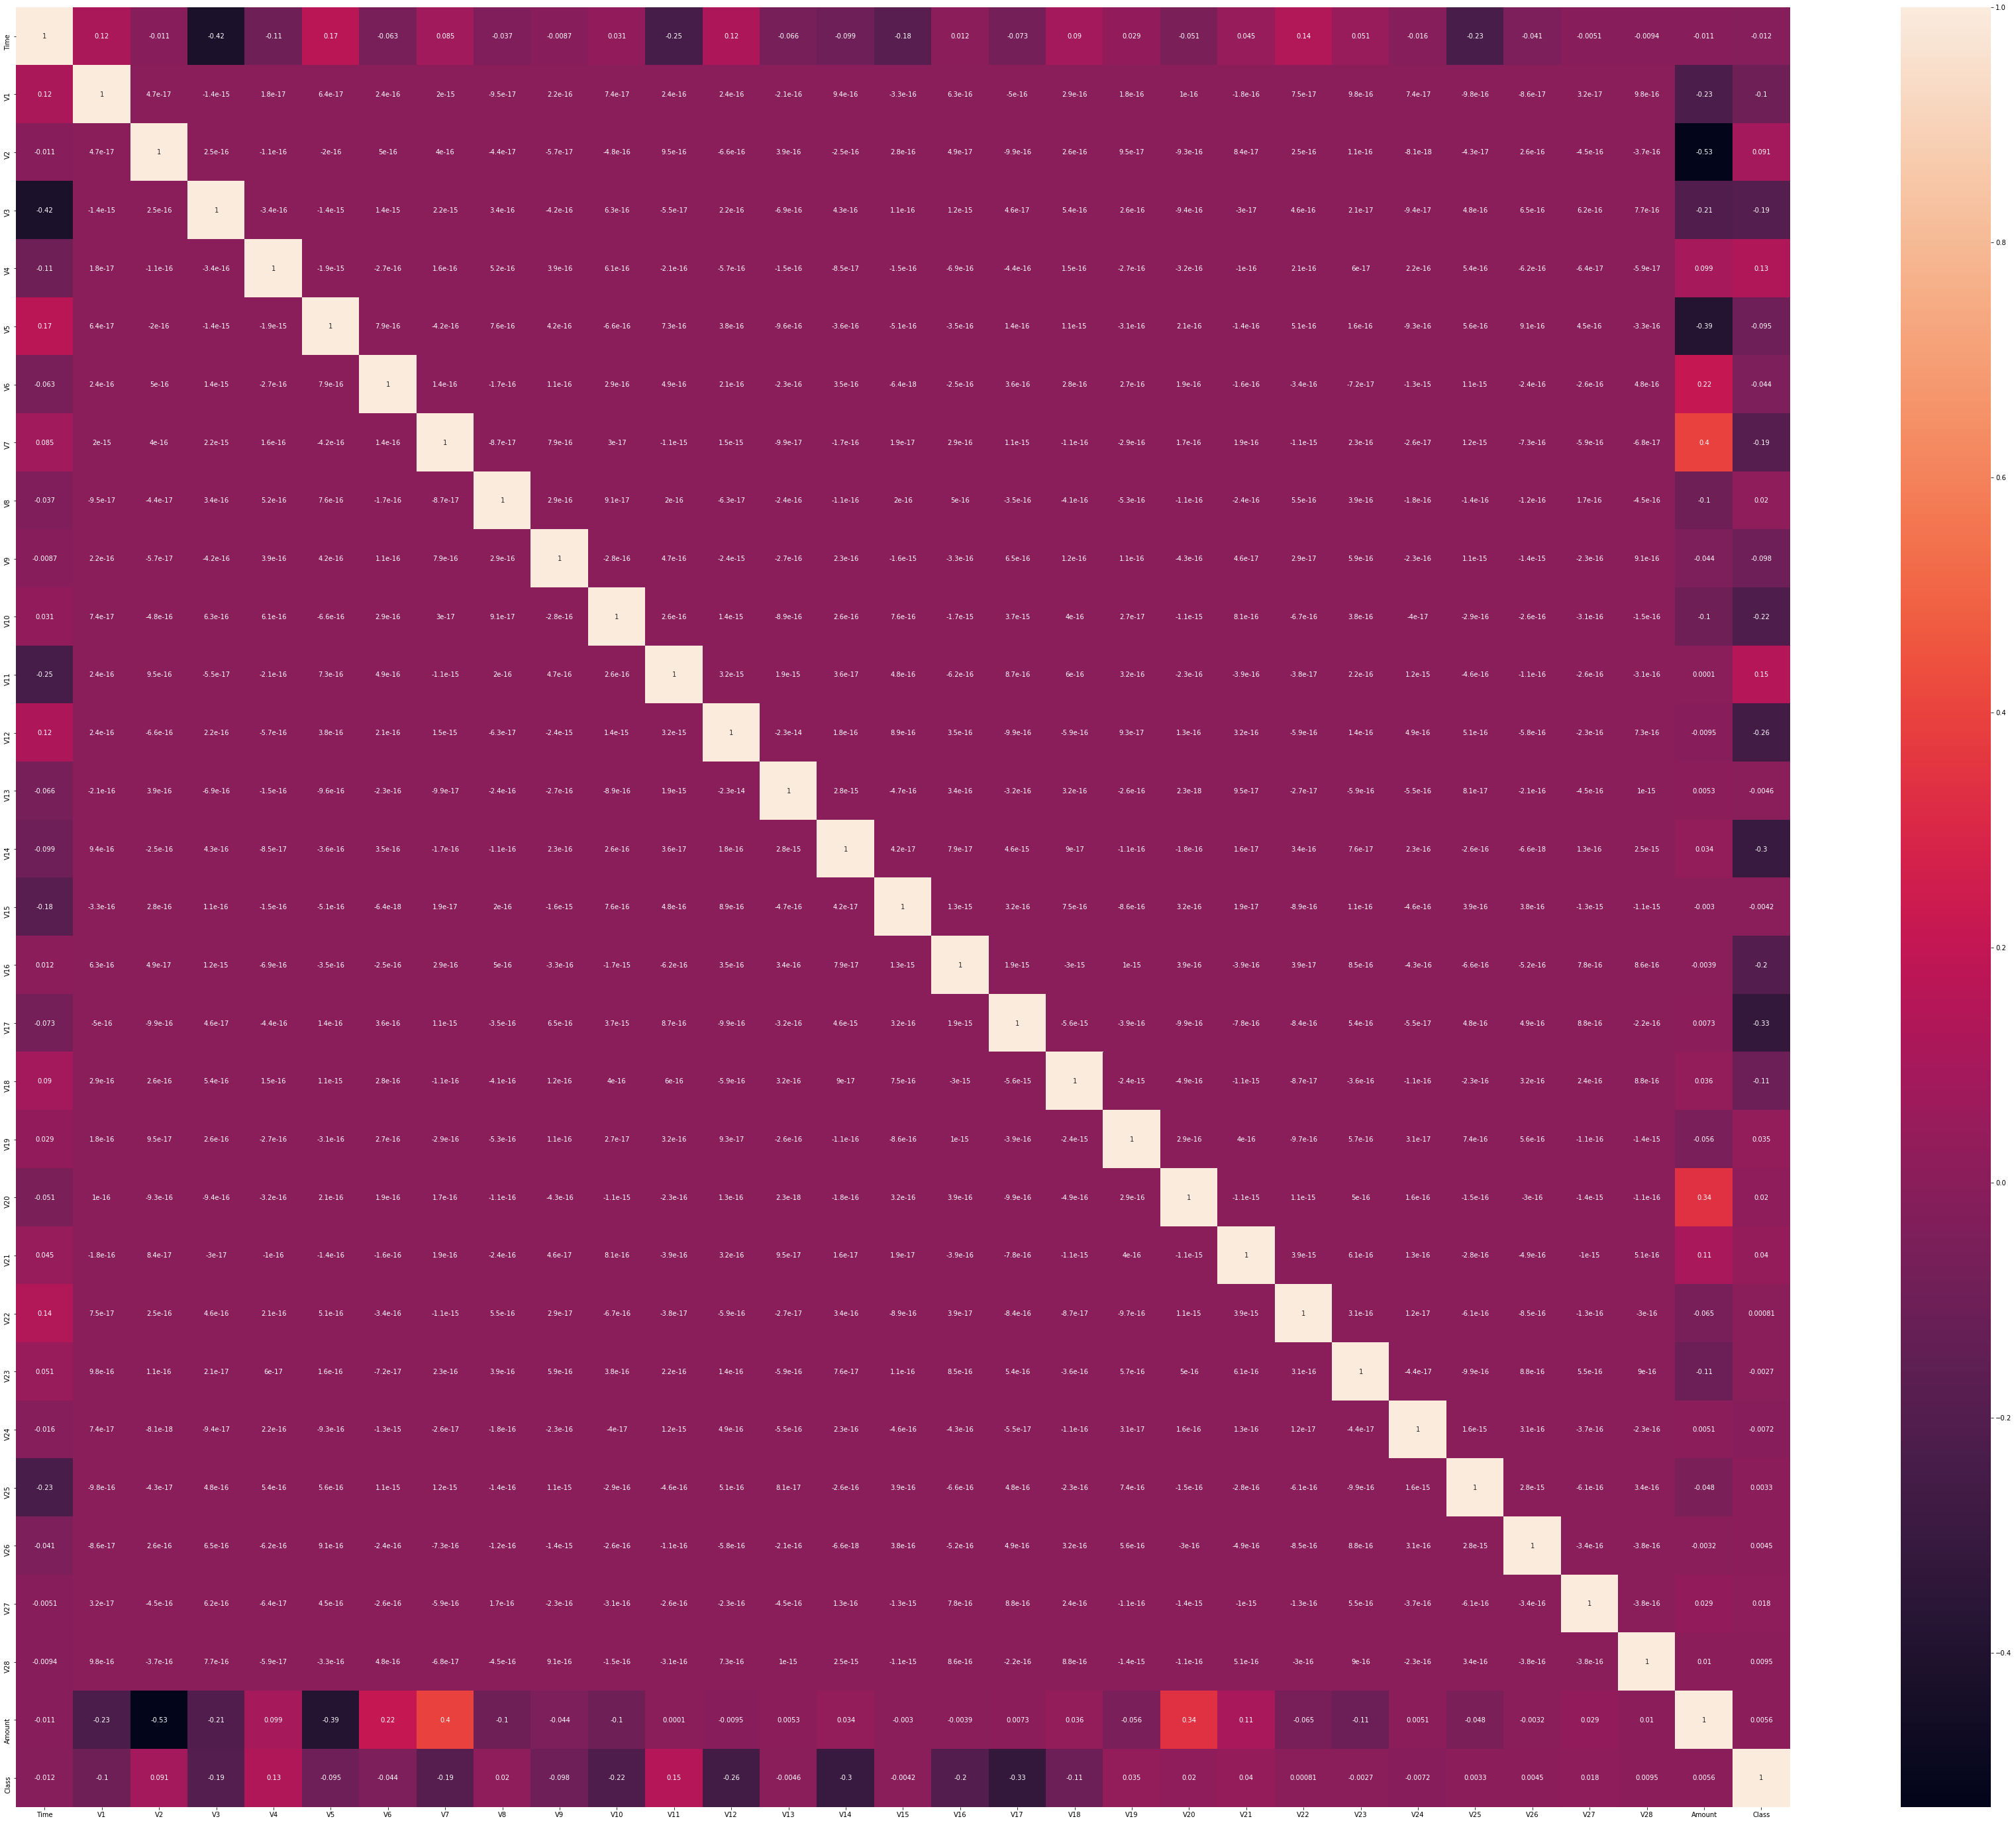

In [35]:
#heatmap = sns.heatmap(data.corr(method='spearman'))
plt.figure(figsize = (60,50))        # Size of the figure
sns.heatmap(data.corr(),annot = True)
plt.show()

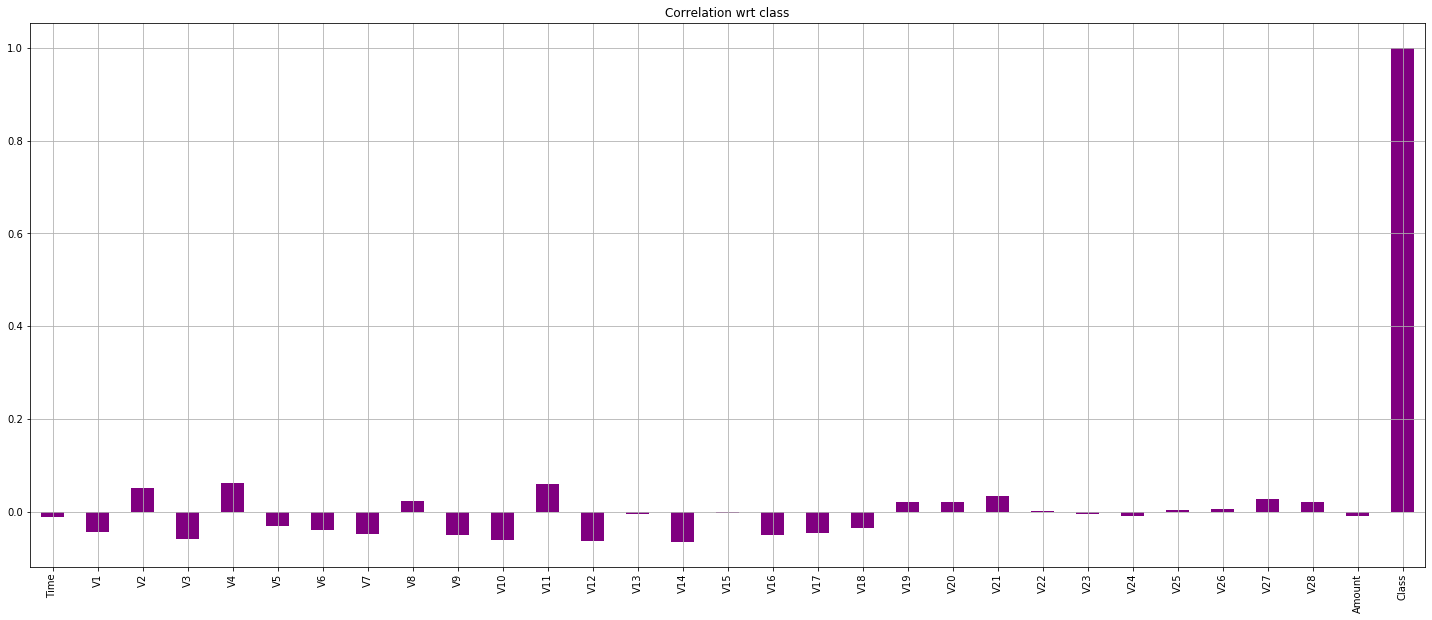

In [53]:
data.corrwith(data.Class, method='spearman').plot.bar(figsize = (25, 10), title = "Correlation wrt class", fontsize = 10,rot = 90, grid = True, color=['purple'])
plt.show()

## Splitting data into features and lables 

In [37]:
model_train = model_data.drop("Class", 1).values
model_test = model_data["Class"].values

## Sampling unbalanced data using SMOTE

In [38]:
oversampler = SMOTE(random_state = 0, n_jobs = -1)
model_train_lr , model_test_lr = oversampler.fit_sample(model_train, model_test)

## Splitting the data into training and testing 

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(model_train_lr, model_test_lr, test_size = 0.25, random_state = 0)

# Building a benchmark model 


In [70]:
# Performing grid search on the classifier using 'recall' as the scoring method using GridSearchCV()

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log_r1 = LogisticRegression()
log_r1.fit(X_train, Y_train)
param_grid = {
            'penalty' : ['l1','l2'], 
            'class_weight' : ['balanced', None], 
            'C' : [0.1, 1, 10, 100]
            }
CV_log_r1 = GridSearchCV(estimator = log_r1, param_grid = param_grid , scoring = 'recall', verbose = 1, n_jobs = -1)
CV_log_r1.fit(X_train, Y_train)
best_parameters = CV_log_r1.best_params_
print('Best parameters for using logistic reg', best_parameters)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.0min finished


Best parameters for using logistic reg {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2'}


In [68]:
from sklearn.metrics import classification_report
log_r1 = LogisticRegression(C= 10, class_weight= 'balanced', penalty= 'l2')
log_r1.fit(X_train, Y_train)
y_pred = log_r1.predict(X_test)
print(classification_report(Y_test, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70856
           1       1.00      1.00      1.00     71302

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



#  Logistic Regression Classifier will work  as a bench mark model  as it is considered good for binary classsification mthods.

# 1 Logistic Regression

In [71]:
lr = LogisticRegression(max_iter=200, random_state=0, n_jobs = -1)
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [72]:
lr_predict = lr.predict(X_test)

## Prediction Scores of log reg

In [73]:
lr_accuracy = accuracy_score(Y_test, lr_predict)
lr_recall = recall_score(Y_test, lr_predict)
lr_cm = confusion_matrix(Y_test, lr_predict)
lr_auc = roc_auc_score(Y_test, lr_predict)

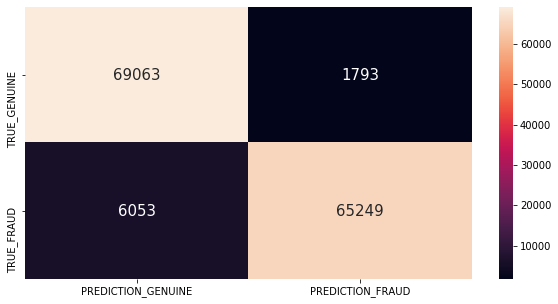

In [74]:
lr_cm = pd.DataFrame(lr_cm, ['TRUE_GENUINE','TRUE_FRAUD'],['PREDICTION_GENUINE','PREDICTION_FRAUD'])
pyplot.figure(figsize = (10,5))
sns.heatmap(lr_cm, annot=True,annot_kws={"size": 15},fmt='g')

In [75]:
print("LR_ACCURACY: {:.2%}".format(lr_accuracy))
print("LR_RECALL: {:.2%}".format(lr_recall))
print("LR_ROC AUC: {:.2%}".format(lr_auc))

LR_ACCURACY: 94.48%
LR_RECALL: 91.51%
LR_ROC AUC: 94.49%


# LOG REG SCORES WILL BE USED AS A BENCHMARK SCORES

In [ ]:
## here labelled data is used to calculate AUC, ROC and Recall

##  using SMOTETomek for sampling unbalanced data

In [ ]:
## SMOTETomek is a combination of upsampling and down sampling methods hence used for this model

In [76]:
from imblearn.combine import SMOTETomek
sampler = SMOTETomek(random_state = 0, n_jobs = -1)
model_train_rf , model_test_rf = sampler.fit_sample(model_train, model_test)

# using stratified shuffle spilt

In [78]:
Str_split = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=0)

In [79]:
for train_index, test_index in Str_split.split(model_train_rf, model_test_rf):
    X_train, X_test = model_train_rf[train_index], model_train_rf[test_index]
    Y_train, Y_test = model_test_rf[train_index], model_test_rf[test_index]

# Random Forest Model

In [80]:
rf = RandomForestClassifier(n_estimators= 200, criterion = 'entropy', random_state = 0, n_jobs = -1)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [81]:
rf_predict = rf.predict(X_test)

# Prediction Scores for Random Forest

In [82]:
rf_accuracy = accuracy_score(Y_test, rf_predict)
rf_recall = recall_score(Y_test, rf_predict)
rf_cm = confusion_matrix(Y_test, rf_predict)
rf_auc = roc_auc_score(Y_test, rf_predict)

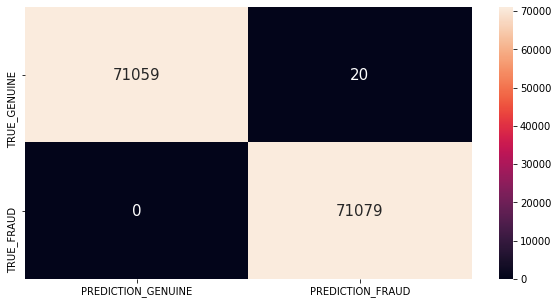

In [83]:
rf_cm = pd.DataFrame(rf_cm, ['TRUE_GENUINE','TRUE_FRAUD'],['PREDICTION_GENUINE','PREDICTION_FRAUD'])
pyplot.figure(figsize = (10,5))
sns.heatmap(rf_cm, annot=True,annot_kws={"size": 15},fmt='g')

In [84]:
print("RANDOM FOREST ACCURACY: {:.2%}".format(rf_accuracy))
print("RANDOM FOREST RECALL: {:.2%}".format(rf_recall))
print("RANDOM FOREST ROC_AUC: {:.2%}".format(rf_auc))

RANDOM FOREST ACCURACY: 99.99%
RANDOM FOREST RECALL: 100.00%
RANDOM FOREST ROC_AUC: 99.99%


# SO FAR RANDOM FOREST SHOWS THE BEST PROMSING RESULTS OF RECALL

# It does not require any refinement as it got an AUC score of 99.99%, which means this model captured all the fraudulent transactions...

#  using TomekLinks for sampling unbalanced data

In [ ]:
## TomekLinks is a down sampling method which decreases the normal transactions in data 
## so here the fraud transactions and normal transactions are of equal quantity....

In [85]:
from imblearn.under_sampling import TomekLinks
undersampler = TomekLinks(random_state = 0, n_jobs = -1)
model_train_km , model_test_km = sampler.fit_sample(model_train, model_test)

# Best clusters 

In [88]:
wcss = []
for i in range(1, 11):
    kmeans_model = KMeans(n_clusters = i, max_iter = 200, random_state = 0, n_jobs = -1)
    kmeans_model.fit(model_train_km)
    wcss.append(kmeans_model.inertia_)

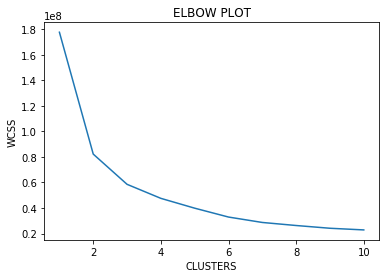

In [89]:
plt.plot(range(1, 11), wcss)
plt.title('ELBOW PLOT')
plt.xlabel('CLUSTERS')
plt.ylabel('WCSS')
plt.show()

# K-Means Clustering

In [90]:
kmeans = KMeans(n_clusters = 2, max_iter = 200, random_state = 0, n_jobs = -1).fit(model_train_km)

In [91]:
centers = kmeans.cluster_centers_

In [93]:
from scipy import spatial
distance = pd.DataFrame(spatial.distance.cdist(model_train_km, centers, 'euclidean'))
distance['MEAN_DIST'] = distance.apply(np.mean, axis=1)
distance.head().transpose()

,0,1,2,3,4
0,5.666570,4.794702,7.495325,6.193039,5.546435
1,38.973187,38.884258,39.358736,39.171095,38.912090
MEAN_DIST,22.319879,21.839480,23.427031,22.682067,22.229263


In [96]:
out_per = np.percentile(distance['MEAN_DIST'], 95)

In [97]:
model_predict_km = np.where(distance['MEAN_DIST'] >= out_per, 1, 0)

# Prediction Scores

In [98]:
km_accuracy = accuracy_score(model_test_km, model_predict_km)
km_recall = recall_score(model_test_km, model_predict_km)
km_cm = confusion_matrix(model_test_km, model_predict_km)
km_auc = roc_auc_score(model_test_km, model_predict_km)

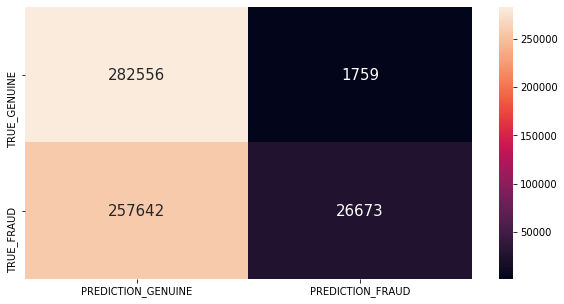

In [99]:
km_cm = pd.DataFrame(km_cm, ['TRUE_GENUINE','TRUE_FRAUD'],['PREDICTION_GENUINE','PREDICTION_FRAUD'])
pyplot.figure(figsize = (10,5))
sns.heatmap(km_cm, annot=True,annot_kws={"size": 15},fmt='g')

In [100]:
print("K_MEANS_ACCURACY: {:.2%}".format(km_accuracy))
print("K_MEANS_RECALL: {:.2%}".format(km_recall))
print("K_MEANS_ROC_AUC: {:.2%}".format(km_auc))

K_MEANS_ACCURACY: 54.38%
K_MEANS_RECALL: 9.38%
K_MEANS_ROC_AUC: 54.38%


# this model hasn’t performed very well in catching the fraud transactions as it is primarily used of segmentation of data

# XGBoost MODEL

In [126]:
from imblearn.combine import SMOTETomek
sampler = SMOTETomek(random_state = 0, n_jobs = -1)
model_train_xgb , model_test_xgb = sampler.fit_sample(model_train, model_test)

In [127]:
Str_split = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=0)

In [128]:
for train_index, test_index in Str_split.split(model_train_xgb, model_test_xgb):
    X_train, X_test = model_train_xgb[train_index], model_train_xgb[test_index]
    Y_train, Y_test = model_test_xgb[train_index], model_test_xgb[test_index]

In [ ]:
# importiing libraries

In [129]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [ ]:
#FITTING MODEL ON TRAIN DATA

In [130]:
model_boost = XGBClassifier()
model_boost.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [103]:
#MAKINF PREDICTION FOR TEST DATA
y_predict = model_boost.predict_proba(X_test)
y_predict[:10]

array([[9.9999487e-01, 5.1210836e-06],
       [1.3113022e-06, 9.9999869e-01],
       [9.4175339e-06, 9.9999058e-01],
       [9.9982840e-01, 1.7162407e-04],
       [1.2636185e-05, 9.9998736e-01],
       [9.9999458e-01, 5.4338871e-06],
       [2.1889806e-03, 9.9781102e-01],
       [9.9959522e-01, 4.0478969e-04],
       [5.4836273e-06, 9.9999452e-01],
       [1.1086464e-05, 9.9998891e-01]], dtype=float32)

In [134]:
#EVALUATING PREDICTIONS
import sklearn.metrics as metrics
roc = metrics.roc_auc_score(Y_test, y_predict[:, 1])
print("AREA UNDER CURVE: %.2f%%"% roc)

AREA UNDER CURVE: 1.00%


# HYPERPARAMETER TUNING

In [135]:
from sklearn.model_selection import GridSearchCV
folds = 3
# RANGE
para_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          

# SPECIFYING MODEL
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

model_xgb_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = para_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)  

In [136]:
#FITTING MODEL
model_xgb_cv.fit(X_train, Y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 16.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimato...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=Non

In [ ]:
#XGB_CV RESULTS

In [138]:
xgb_cv_results = pd.DataFrame(model_xgb_cv.cv_results_)
xgb_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,33.249431,2.883285,0.342877,0.055740,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999433,0.999540,0.999453,0.999476,0.000046,4,0.999531,0.999514,0.999560,0.999535,0.000019
1,58.743876,7.373483,0.501658,0.098391,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999446,0.999556,0.999412,0.999471,0.000061,5,0.999547,0.999542,0.999520,0.999537,0.000012
2,66.281303,6.043652,0.459108,0.052959,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999380,0.999521,0.999443,0.999448,0.000057,6,0.999489,0.999507,0.999549,0.999515,0.000025
3,45.954376,5.059372,0.503654,0.158739,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999904,0.999917,0.999899,0.999907,0.000007,3,0.999943,0.999940,0.999963,0.999949,0.000010
4,59.269170,11.378811,0.469079,0.039090,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999899,0.999936,0.999916,0.999917,0.000015,2,0.999953,0.999956,0.999964,0.999958,0.000005
5,66.712734,3.661829,0.438494,0.065462,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999896,0.999942,0.999919,0.999919,0.000019,1,0.999955,0.999958,0.999964,0.999959,0.000004


In [ ]:
# CHOOSING HYPERPARA

In [140]:

param = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# FITING MODEL 
model_boost = XGBClassifier(params = param)
model_boost.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic',
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method=None, validate_parameters=False,
              verbosity=None)

In [141]:
# PREDICTING
y_predict_actual = model_boost.predict(X_test)
y_predict = model_boost.predict_proba(X_test)
y_predict[:10]

array([[9.9999487e-01, 5.1210836e-06],
       [1.3113022e-06, 9.9999869e-01],
       [9.4175339e-06, 9.9999058e-01],
       [9.9982840e-01, 1.7162407e-04],
       [1.2636185e-05, 9.9998736e-01],
       [9.9999458e-01, 5.4338871e-06],
       [2.1889806e-03, 9.9781102e-01],
       [9.9959522e-01, 4.0478969e-04],
       [5.4836273e-06, 9.9999452e-01],
       [1.1086464e-05, 9.9998891e-01]], dtype=float32)

In [148]:
import sklearn
auc_xgb = sklearn.metrics.roc_auc_score(Y_test, y_predict[:, 1])
print("XGB_AUC: {:.2%}".format(auc_xgb))    

XGB_AUC: 100.00%


In [186]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

confusion_matrix_testData = confusion_matrix(Y_test,y_predict_actual)
print(confusion_matrix(Y_test,y_predict_actual))

total1=sum(sum(confusion_matrix_testData))
accuracy_1=(confusion_matrix_testData[0,0]+confusion_matrix_testData[1,1])/total1
print ('ACCURACY : ', accuracy_1)

sensitivity_1 = confusion_matrix_testData[0,0]/(confusion_matrix_testData[0,0]+confusion_matrix_testData[0,1])
print('RECALL  : ', sensitivity_1 )

specificity_1 = confusion_matrix_testData[1,1]/(confusion_matrix_testData[1,0]+confusion_matrix_testData[1,1])
print('SPECIFICITY : ', specificity_1)

[[71045    34]
 [    0 71079]]
ACCURACY :  0.9997608294995709
RECALL  :  0.9995216589991418
SPECIFICITY :  1.0


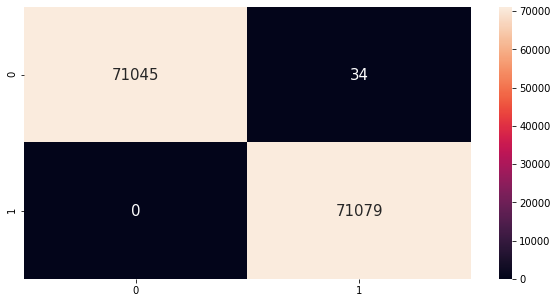

In [160]:
xgb_cm = pd.DataFrame(confusion_matrix_testData, ['TRUE_GENUINE','TRUE_FRAUD'],['PREDICTION_GENUINE','PREDICTION_FRAUD'])
pyplot.figure(figsize = (10,5))
sns.heatmap(confusion_matrix_testData, annot=True,annot_kws={"size": 15},fmt='g')

In [161]:
## predistion of XGB

In [162]:
y_predict_train = model_boost.predict(X_train)

In [187]:
confusion_matrix_trainData = confusion_matrix(Y_train,y_predict_train)
print(confusion_matrix_trainData)
total2=sum(sum(confusion_matrix_trainData))
accuracy_2=(confusion_matrix_trainData[0,0]+confusion_matrix_trainData[1,1])/total2
print ('ACCURACY : ', accuracy_2)

sensitivity_2 = confusion_matrix_trainData[0,0]/(confusion_matrix_trainData[0,0]+confusion_matrix_trainData[0,1])
print('RECALL : ', sensitivity_2 )

specificity_2 = confusion_matrix_trainData[1,1]/(confusion_matrix_trainData[1,0]+confusion_matrix_trainData[1,1])
print('SPECIFICITY : ', specificity_2)

[[213232      4]
 [     0 213236]]
ACCURACY :  0.9999906207207038
RECALL :  0.9999812414414077
SPECIFICITY :  1.0


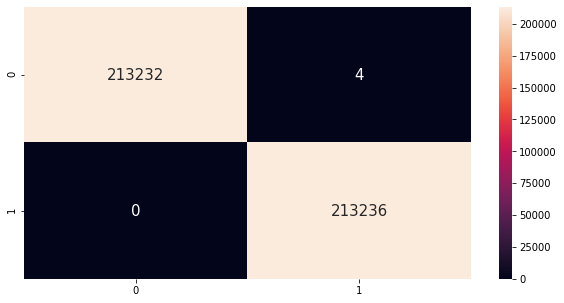

In [165]:
xgb_cm_train = pd.DataFrame(confusion_matrix_trainData, ['TRUE_GENUINE','TRUE_FRAUD'],['PREDICTION_GENUINE','PREDICTION_FRAUD'])
pyplot.figure(figsize = (10,5))
sns.heatmap(confusion_matrix_trainData, annot=True,annot_kws={"size": 15},fmt='g')

In [166]:
### THERE ISNT MUCH DEVIATION IN TRAIN AND TEST DATA WHICH INDICATES THE MODEL ISNT OVERFITTING

# comparing the performance metrics from all the models....

In [188]:
Prediction_Accuracy_Model={ 'Logistic Regression': lr_accuracy, 'Random Forest': rf_accuracy, 'K-Means': km_accuracy, 'XGB': accuracy_2}
Prediction_Recall_Model={ 'Logistic Regression': lr_recall, 'Random Forest': rf_recall, 'K-Means': km_recall, 'XGB':sensitivity_2}
Prediction_AUC_Model={ 'Logistic Regression': lr_auc,'Random Forest': rf_auc, 'K-Means': km_auc, 'XGB': auc_xgb}

Text(0.5, 0, 'AUC SCORES')

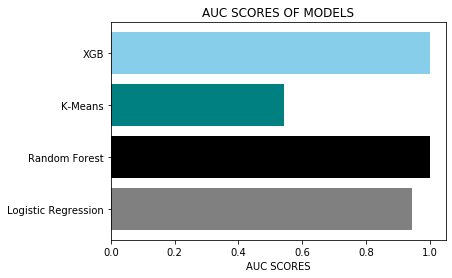

In [190]:
pyplot.title('AUC SCORES OF MODELS')
colors = ['grey', 'black','teal','SKYBLUE']
pyplot.barh(range(len(Prediction_AUC_Model)), list(Prediction_AUC_Model.values()), color=colors, align='center')
pyplot.yticks(range(len(Prediction_AUC_Model)), list(Prediction_AUC_Model.keys()))
pyplot.xlabel('AUC SCORES')

Text(0.5, 0, 'ACCURACY SCORES')

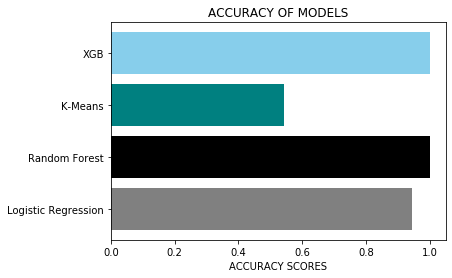

In [192]:
pyplot.title('ACCURACY OF MODELS')
colors = ['grey', 'black','teal','SKYBLUE']
pyplot.barh(range(len(Prediction_Accuracy_Model)), list(Prediction_Accuracy_Model.values()), color=colors,align='center')
pyplot.yticks(range(len(Prediction_Accuracy_Model)), list(Prediction_Accuracy_Model.keys()))
pyplot.xlabel('ACCURACY SCORES')

Text(0.5, 0, 'Recall Score')

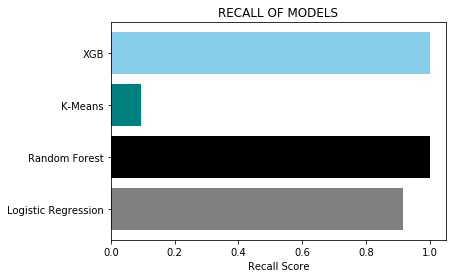

In [193]:
pyplot.title('RECALL OF MODELS')
colors = ['grey', 'black','teal','SKYBLUE']
pyplot.barh(range(len(Prediction_Recall_Model)), list(Prediction_Recall_Model.values()), color=colors, align='center')
pyplot.yticks(range(len(Prediction_Recall_Model)), list(Prediction_Recall_Model.keys()))
pyplot.xlabel('Recall Score')

# CONCLUSION

RANDOM FOREST HAS HIGHEST ACCURACY IN THE MODELS

RANDOM FOREST HAS THE HIGHEST RECALL SCORES IN THE MODEL

RANDOM FOREST HAS THE HIGHEST AUC SCORE AMONG ALL THE MODELS

HENCE, RANDOM FOREST IS THE BEST MODEL TO USE HERE

KNN PERFORMED THE WORST AMONG ALL THE MODELS